In [ ]:
#This file documents the codes used for the final iteration of the housing project

In [2]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration4').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/14 09:40:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# 2. Data Preparation

## 2.1 Data Collection

In [3]:
#load the data file
df = spark.read.option("header", "true").option("inferSchema", "true").csv('Iteration 4 Datasets/Beijing Housing.csv')
df_missing = spark.read.option("header", "true").option("inferSchema", "true").csv('Iteration 4 Datasets/Missing Data.csv')

In [11]:
#Verify data
spark.conf.set("spark.sql.debug.maxToStringFields", 100)
df.show()
df_missing.show()

+--------------------+------------+----------+---------+-------------+----------+----+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+
|                 url|          id|       Lng|      Lat|          Cid| tradeTime| DOM|followers|totalPrice|price|square|livingRoom|drawingRoom|kitchen|bathRoom|floor|buildingType|constructionTime|renovationCondition|buildingStructure|ladderRatio|elevator|fiveYearsProperty|subway|district|communityAverage|
+--------------------+------------+----------+---------+-------------+----------+----+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+
|https://bj.lianji...|101084782030|116.475489| 40.01952|1111027376244|2016-08-0

In [5]:
pandas_df = df.toPandas()
print(pandas_df)

                                                      url            id  \
0       https://bj.lianjia.com/chengjiao/101084782030....  101084782030   
1       https://bj.lianjia.com/chengjiao/101086012217....  101086012217   
2       https://bj.lianjia.com/chengjiao/101086041636....  101086041636   
3       https://bj.lianjia.com/chengjiao/101086406841....  101086406841   
4       https://bj.lianjia.com/chengjiao/101086920653....  101086920653   
...                                                   ...           ...   
318846  https://bj.lianjia.com/chengjiao/BJYZ92311192....  BJYZ92311192   
318847  https://bj.lianjia.com/chengjiao/BJYZ92320171....  BJYZ92320171   
318848  https://bj.lianjia.com/chengjiao/BJYZ92324217....  BJYZ92324217   
318849  https://bj.lianjia.com/chengjiao/BJYZ92333313....  BJYZ92333313   
318850  https://bj.lianjia.com/chengjiao/BJYZ92363553....  BJYZ92363553   

               Lng        Lat            Cid   tradeTime   DOM  followers  \
0       116.475489  40

## 2.2 Data Description

In [6]:
#see data types
df.printSchema()

root
 |-- url: string (nullable = true)
 |-- id: string (nullable = true)
 |-- Lng: double (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Cid: long (nullable = true)
 |-- tradeTime: string (nullable = true)
 |-- DOM: string (nullable = true)
 |-- followers: integer (nullable = true)
 |-- totalPrice: double (nullable = true)
 |-- price: integer (nullable = true)
 |-- square: double (nullable = true)
 |-- livingRoom: string (nullable = true)
 |-- drawingRoom: string (nullable = true)
 |-- kitchen: integer (nullable = true)
 |-- bathRoom: string (nullable = true)
 |-- floor: string (nullable = true)
 |-- buildingType: string (nullable = true)
 |-- constructionTime: string (nullable = true)
 |-- renovationCondition: integer (nullable = true)
 |-- buildingStructure: integer (nullable = true)
 |-- ladderRatio: double (nullable = true)
 |-- elevator: double (nullable = true)
 |-- fiveYearsProperty: double (nullable = true)
 |-- subway: double (nullable = true)
 |-- district: intege

## 2.3 Data Exploration

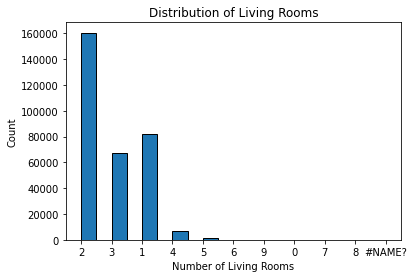

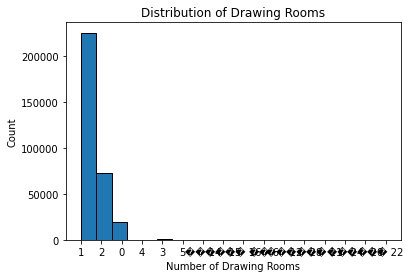

/home/ubuntu/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1450 (\N{HEBREW ACCENT YERAH BEN YOMO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Hebrew natively.
  fig.canvas.print_figure(bytes_io, **kw)


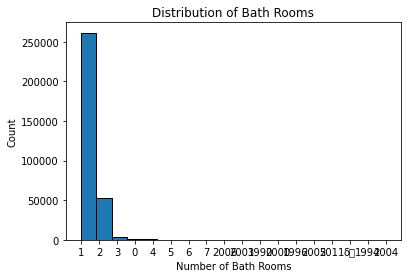

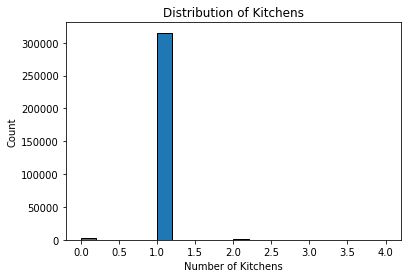

In [13]:
#import required libraries
import matplotlib.pyplot as plt
plt.hist(pandas_df['livingRoom'], bins=20, edgecolor='black')
plt.xlabel('Number of Living Rooms')
plt.ylabel('Count')
plt.title('Distribution of Living Rooms')
plt.show()



plt.hist(pandas_df['drawingRoom'], bins=20, edgecolor='black')
plt.xlabel('Number of Drawing Rooms')
plt.ylabel('Count')
plt.title('Distribution of Drawing Rooms')
plt.show()


plt.hist(pandas_df['bathRoom'], bins=20, edgecolor='black')
plt.xlabel('Number of Bath Rooms')
plt.ylabel('Count')
plt.title('Distribution of Bath Rooms')
plt.show()

plt.hist(pandas_df['kitchen'], bins=20, edgecolor='black')
plt.xlabel('Number of Kitchens')
plt.ylabel('Count')
plt.title('Distribution of Kitchens')
plt.show()




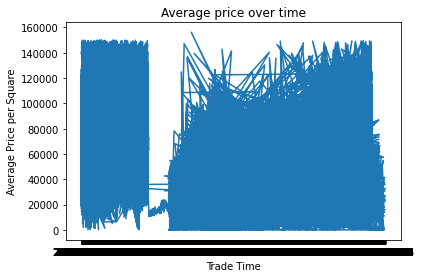

In [15]:
#plot trade Time
x_axis = pandas_df['tradeTime']
y_axis = pandas_df['price']
plt.plot(x_axis, y_axis)
plt.xlabel('Trade Time')
plt.ylabel('Average Price per Square')
plt.title('Average price over time')
plt.show()

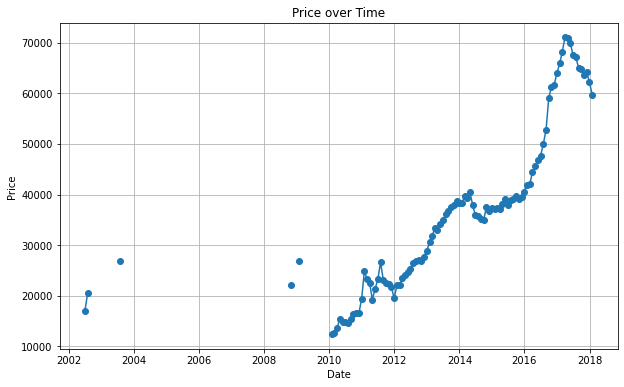

In [27]:
#plot monthly average price over the years
from pyspark.sql.functions import to_date
df = df.withColumn("tradeTime", to_date(df["tradeTime"], "yyyy-MM-dd"))
df = df.orderBy("tradeTime")

time_pdf = df.select("tradeTime", "price", "communityAverage").toPandas()


time_pdf['tradeTime'] = pd.to_datetime(time_pdf['tradeTime'])
time_pdf.set_index("tradeTime", inplace = True)

time_pdf = time_pdf.resample('M').mean()


plt.figure(figsize=(10, 6))
plt.plot(time_pdf.index, time_pdf["price"], marker='o')

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price over Time")
plt.grid(True)
plt.show()

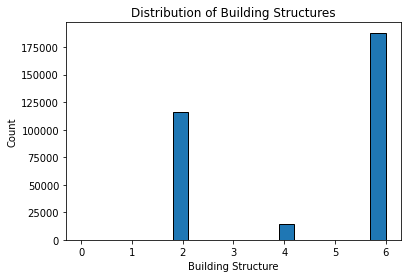

In [29]:
#plot building structure
plt.hist(pandas_df['buildingStructure'], bins=20, edgecolor='black')
plt.xlabel('Building Structure')
plt.ylabel('Count')
plt.title('Distribution of Building Structures')
plt.show()

<AxesSubplot:title={'center':'price'}, xlabel='elevator'>

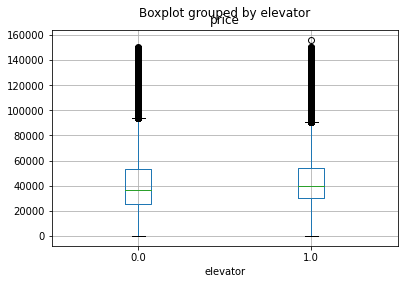

In [31]:
#box plot of elevator
pandas_df.boxplot(by = 'elevator', column = ['price'])

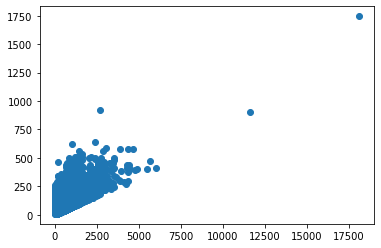

In [32]:
#scatter plot of total price and square
plt.scatter(pandas_df['totalPrice'], pandas_df['square'])
plt.show()